In [1]:
import pandas as pd
# load the source data for each panel 
panel_b = pd.read_excel('./SD_FIG1.xlsx',engine='openpyxl',sheet_name='Panel_b',index_col=0)
panel_c = pd.read_excel('./SD_FIG1.xlsx',engine='openpyxl',sheet_name='Panel_c',index_col=0)
panel_d = pd.read_excel('./SD_FIG1.xlsx',engine='openpyxl',sheet_name='Panel_d',index_col=0)
panel_e = pd.read_excel('./SD_FIG1.xlsx',engine='openpyxl',sheet_name='Panel_e',index_col=0)
panel_f = pd.read_excel('./SD_FIG1.xlsx',engine='openpyxl',sheet_name='Panel_f',index_col=0)
panel_g = pd.read_excel('./SD_FIG1.xlsx',engine='openpyxl',sheet_name='Panel_g',index_col=0)

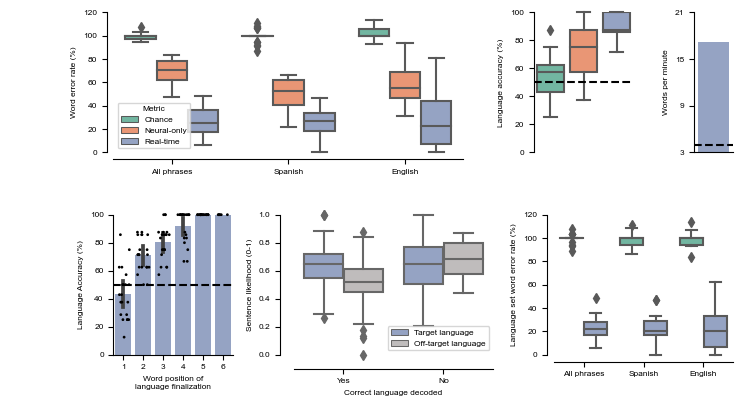

In [2]:
# Computes and plots the dendrogram
import seaborn as sns
import matplotlib.font_manager
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from RT.util import fileHandler
from gimutil.visualization import plotting_tools
# set plotting parameters
plt.rcParams.update({'font.size': 6})
plt.rcParams.update({'font.sans-serif':'Arial'})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'


# Specifies plot parameters
rows = {
    'wer_start' : 0,
    'wer_stop'  : 225,
    'lang_start' : 0,
    'lang_stop' : 225,
    'force_start': 325,
    'force_stop' : 550,
    'total'      : 550,
}
cols = {
    'wer_start' : 0,
    'wer_stop'  : 350,#320
    'lang_start' : 420,#400
    'lang_stop' : 520,#500
    'wpm_start' : 580,
    'wpm_stop'  : 620,
    'beams_start': 180,#370,
    'beams_stop': 380,#470,
    'step_start': 0,#520,
    'step_stop' : 120,#620,
    'werforce_start': 440,
    'werforce_stop': 620,
    'total'      : 620
}
all_panel_params = {
    'wer' : {'row_and_col_spec' : ('wer', 'wer')},
    'lang'  : {'row_and_col_spec' : ('lang', 'lang')},
    'force_wer'           : {'row_and_col_spec' : ('force', 'werforce')},
    'wpm'           : {'row_and_col_spec' : ('wer', 'wpm')},
    'beams'           : {'row_and_col_spec' : ('force', 'beams')},
    'step'           : {'row_and_col_spec' : ('force', 'step')}
}


# AAC calculation
import numpy as np
aac_speed = 3.97


a = sns.color_palette("Set2")
hex_col = a.as_hex()
a = np.array(a)


w_to_h = 1.8
width = 8
# Creates the plot
fig, axs = plotting_tools.setup_figure(
    all_panel_params=all_panel_params, row_specs=rows, col_specs=cols,dpi=100,
    figsize=(width,width/w_to_h)
)


# plot wers 
ax = axs['wer']
sns.boxplot(data=panel_b,x='lang',y='WER',hue='Metric',hue_order=['Chance','Neural-only','Real-time'],order=['overall','spanish','english'],ax=ax,palette=a)
ax.set_xlabel('')
ax.set_ylabel('Word error rate (%)')
ax.set_ylim([0,120])
ax.set_xticklabels(['All phrases','Spanish','English'])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)


# plot the language accuracy
ax = axs['lang']
sns.boxplot(data=panel_c,x='paradigm',y='Acc',ax=ax,whis=1,order=['Chance','Neural-only','Real-time'],palette=a)
ax.axhline(50,color='k',linestyle='--')
ax.set_ylabel('Language accuracy (%)')
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylim([0,100])
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)

# plot the force WER accuracy
ax = axs['force_wer']
sns.boxplot(data=panel_g,x='lang',y='WER',hue='Metric',hue_order=['Chance','Real-time'],ax=ax,order=['overall','spanish','english'],palette=a[[0,2]])
ax.set_xlabel('')
ax.set_ylabel('Language set word error rate (%)')
ax.legend([],[], frameon=False)
ax.set_ylim([0,120])
ax.set_xticklabels(['All phrases','Spanish','English'])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)


# plot the wpm
ax = axs['wpm']
sns.barplot(data=panel_d, y='wpm',ax=ax,palette=a[2:])
ax.set_xlabel('')
ax.set_ylabel('Words per minute')
ax.set_xticks([])
ax.set_ylim([3,21])
ax.set_yticks([3,9,15,21])
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)
ax.axhline(aac_speed,linestyle='--',color='k')


# plot the beams 
ax = axs['beams']
seaborn_legend  = sns.boxplot(data=panel_f,x='correct_decode',y='score',hue='target-lang',ax=ax,order=[True,False],
                              palette=[hex_col[2],'#bfbbbb'])#hex_col[2][0] + '0D' + hex_col[2][1:]])
ax.set_xlabel('Correct language decoded')
ax.set_xticklabels(['Yes','No'])
ax.set_ylabel('Sentence likelihood (0-1)')
ax.legend().set_title('')
ax.set_ylim([0,1])
sns.despine(ax=ax, offset=dict(left=10, bottom=10))
ax.set_clip_on(False)
plt.setp(ax.collections, clip_on=False)
plt.setp(ax.lines, clip_on=False, zorder=5)


# plot the accuracy as func of step 
ax = axs['step']
sns.barplot(ax=ax,data=panel_e,x='Word',y='Accuracy',color=hex_col[2],ci=99)
# strip plot
sns.stripplot(ax=ax,data=panel_e,x='Word',y='Accuracy',color='k',size=2,clip_on=False,jitter=0.3)

ax.set_xticklabels(range(1,7))
ax.set_xlabel('Word position of\nlanguage finalization')
ax.set_ylabel('Language Accuracy (%)')
ax.axhline(50,linestyle='--',color='k')
ax.set_ylim([0,100])



plt.savefig('fig_1_nbme.svg',bbox_inches='tight')
plt.show()